In [4]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
#import herschelhelp.cutouts_server as ctts
import scipy

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
#from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp import image_plotting,utils
import pyvo as vo
import glob

import copy

In [5]:
lofar_orig = Table.read('../data/data_release/final_cross_match_catalogue-v1.0.fits')
print(len(lofar_orig))
lofar_orig[0]

31610


Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,ID_OPTICAL,ID_SPITZER,FLAG_OVERLAP,EBV,FUV_flux_corr,FUV_fluxerr_corr,FUV_mag_corr,FUV_magerr_corr,NUV_flux_corr,NUV_fluxerr_corr,NUV_mag_corr,NUV_magerr_corr,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,g_flux_corr,g_fluxerr_corr,g_mag_corr,g_magerr_corr,r_flux_corr,r_fluxerr_corr,r_mag_corr,r_magerr_corr,i_flux_corr,i_fluxerr_corr,i_mag_corr,i_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,y_flux_corr,y_fluxerr_corr,y_mag_corr,y_magerr_corr,g_hsc_flux_corr,g_hsc_fluxerr_corr,g_hsc_mag_corr,g_hsc_magerr_corr,r_hsc_flux_corr,r_hsc_fluxerr_corr,r_hsc_mag_corr,r_hsc_magerr_corr,i_hsc_flux_corr,i_hsc_fluxerr_corr,i_hsc_mag_corr,i_hsc_magerr_corr,z_hsc_flux_corr,z_hsc_fluxerr_corr,z_hsc_mag_corr,z_hsc_magerr_corr,y_hsc_flux_corr,y_hsc_fluxerr_corr,y_hsc_mag_corr,y_hsc_magerr_corr,nb921_hsc_flux_corr,nb921_hsc_fluxerr_corr,nb921_hsc_mag_corr,nb921_hsc_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,ch1_swire_flux_corr,ch1_swire_fluxerr_corr,ch1_swire_mag_corr,ch1_swire_magerr_corr,ch2_swire_flux_corr,ch2_swire_fluxerr_corr,ch2_swire_mag_corr,ch2_swire_magerr_corr,ch3_swire_flux_corr,ch3_swire_fluxerr_corr,ch3_swire_mag_corr,ch3_swire_magerr_corr,ch4_swire_flux_corr,ch4_swire_fluxerr_corr,ch4_swire_mag_corr,ch4_swire_magerr_corr,ch1_servs_flux_corr,ch1_servs_fluxerr_corr,ch1_servs_mag_corr,ch1_servs_magerr_corr,ch2_servs_flux_corr,ch2_servs_fluxerr_corr,ch2_servs_mag_corr,ch2_servs_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,Z_SOURCE,Z_QUAL,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,XrayAGN,2RXS_ID,XMMSL2_ID,ap_to_model_g,ap_to_model_err_g,ap_to_model_r,ap_to_model_err_r,ap_to_model_z,ap_to_model_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,Nfilts,u_rest,g_rest,r_rest,i_rest,z_rest,y_rest,J_rest,K_rest,ch1_servs_rest,ch2_servs_rest,ch1_swire_rest,ch2_swire_rest,ch3_swire_rest,ch4_swire_rest,XID+_rerun_mips,XID+_rerun_pacs,XID+_rerun_SPIRE
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,int64,float32,float32,float64,float64,int64,int64,int32,int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,f

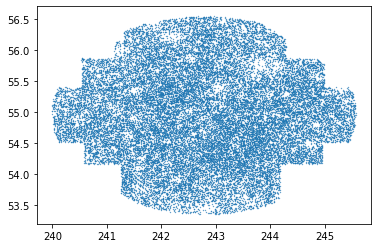

In [6]:
ra = lofar_orig['RA']
dec = lofar_orig['DEC']
plt.scatter(ra,dec,s=0.1)
plt.show()

In [11]:
fname = '../data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0]
hdulist.close()

fname = '../data/data_release/radio_rms_image.fits'
hdulist = fits.open(fname)
radim_header_err = hdulist[0].header
radim_wcs_err = wcs.WCS(radim_header_err).celestial
radim_err = hdulist[0].data[0][0]
hdulist.close()

fname = '../data/data_release/image_full_ampphase_di_m.NS.mask01-2.fits'
hdulist = fits.open(fname)
radim_header_mask = hdulist[0].header
mask_deconv_wcs = wcs.WCS(radim_header_mask).celestial
mask_deconv = hdulist[0].data[0][0]
hdulist.close()

  'HZ' -> 'Hz'. [astropy.wcs.wcs]
  'HZ' -> 'Hz'.


In [12]:
radim_header_mask

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                19845                                                  
NAXIS2  =                19845                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
WCSAXES =                    4 / Number of coordinate axes                      
CRPIX1  =               9923.0 / Pixel coordinate of reference point            
CRPIX2  =               9923.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CRPIX4  =                  1.0 / Pixel coordinate of reference point            
CDELT1  = -0.000416666666666

In [13]:
radim_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                14000                                                  
NAXIS2  =                14000                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
WCSAXES =                    4 / Number of coordinate axes                      
CRPIX1  =               7001.0 / Pixel coordinate of reference point            
CRPIX2  =               7001.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CRPIX4  =                  1.0 / Pixel coordinate of reference point            
CDELT1  = -0.000416666666666

In [5]:
plot_params = {'marker':['o','+','o','v','X','d'],
              'col':['green','cyan','orange','red'],
              'size':100,
              'box_length':1/120,
              'use_redshift':[False,False,False,False]}

28763
plotting 2 sources


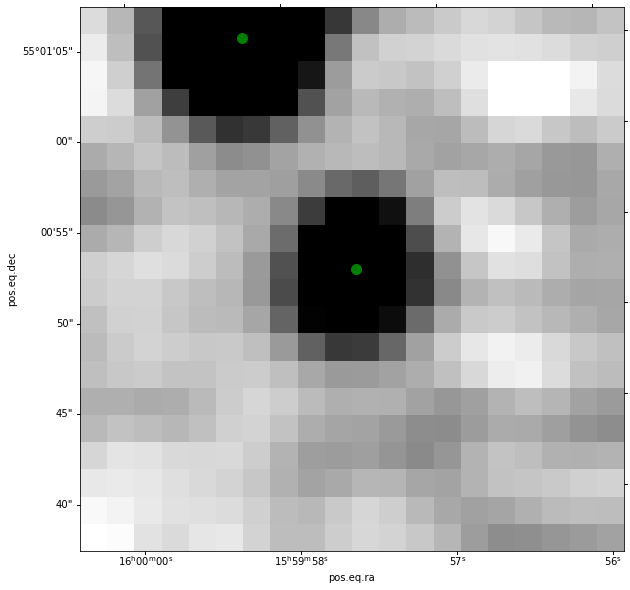

plotting 2 sources


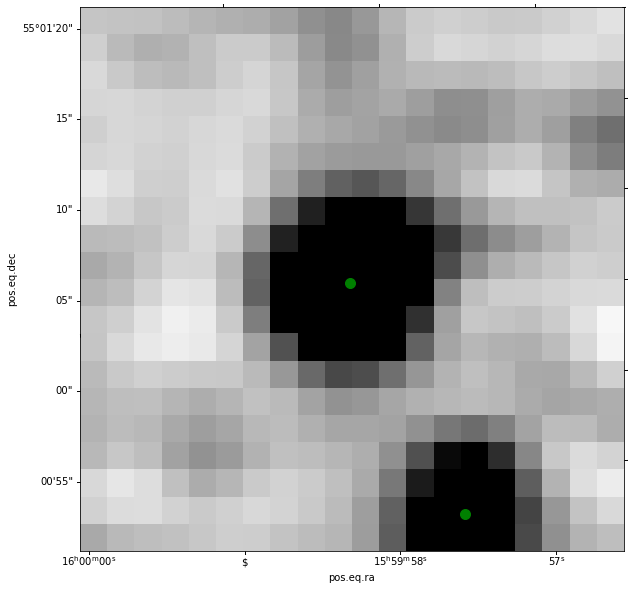

plotting 1 sources


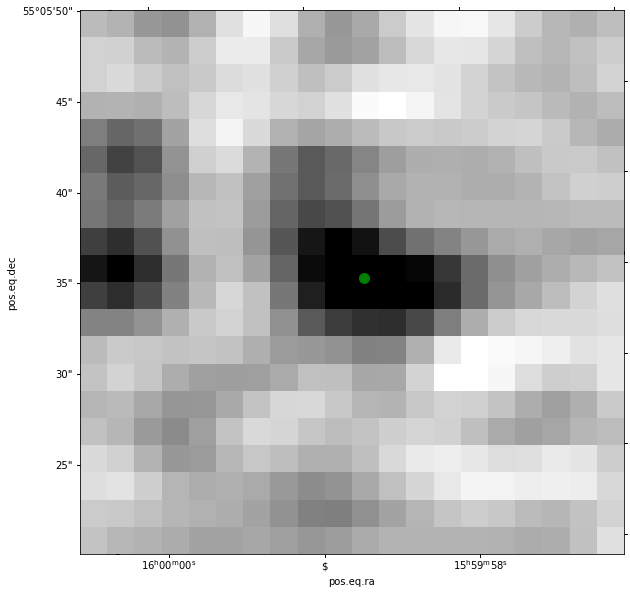

plotting 1 sources


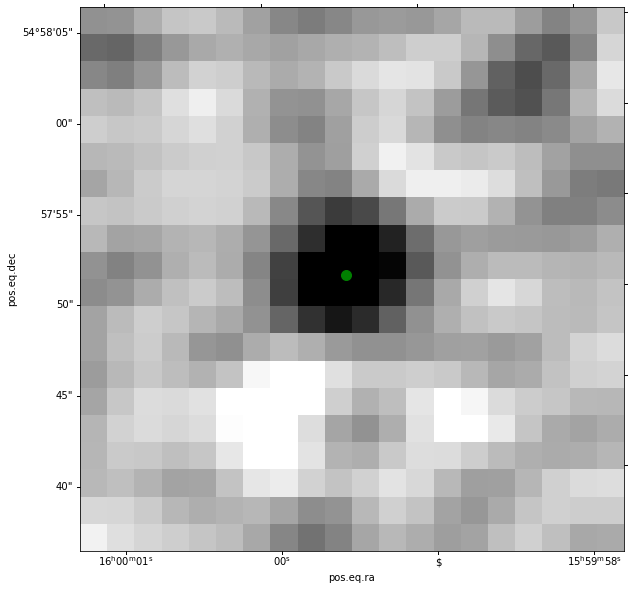

plotting 2 sources


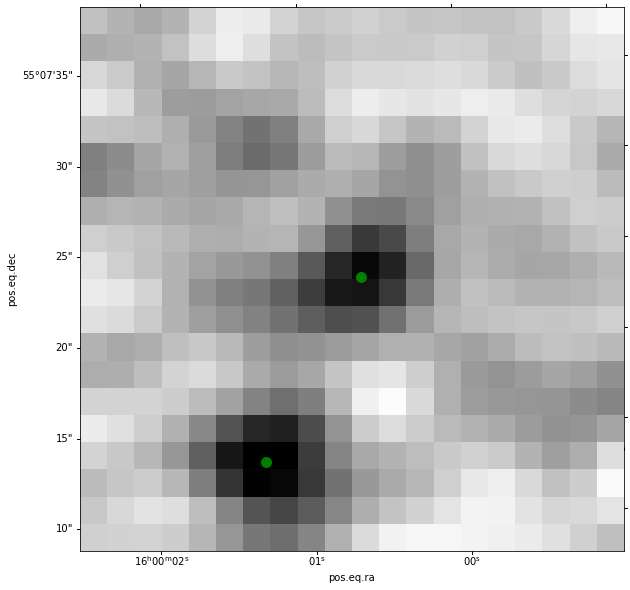

plotting 2 sources


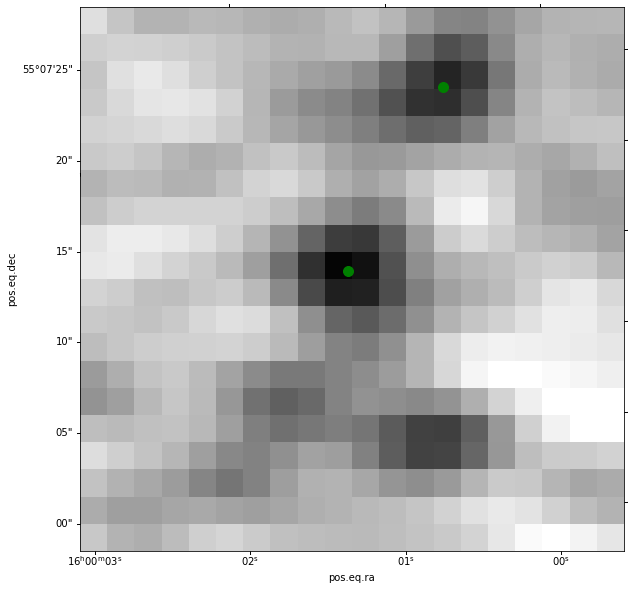

plotting 1 sources


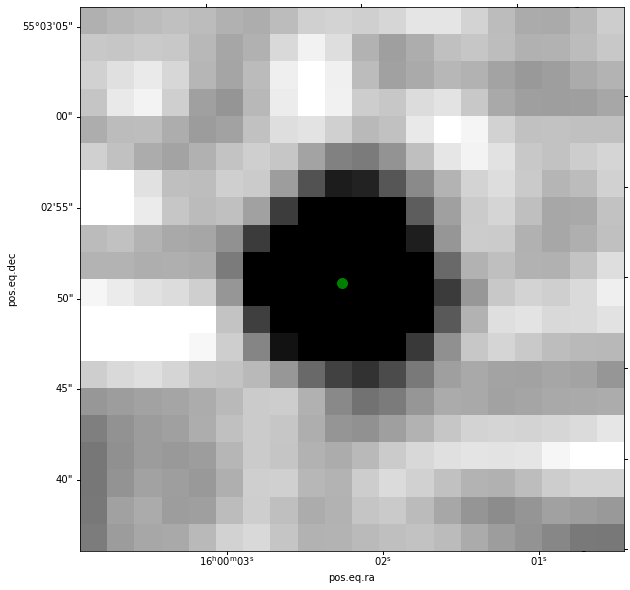

plotting 1 sources


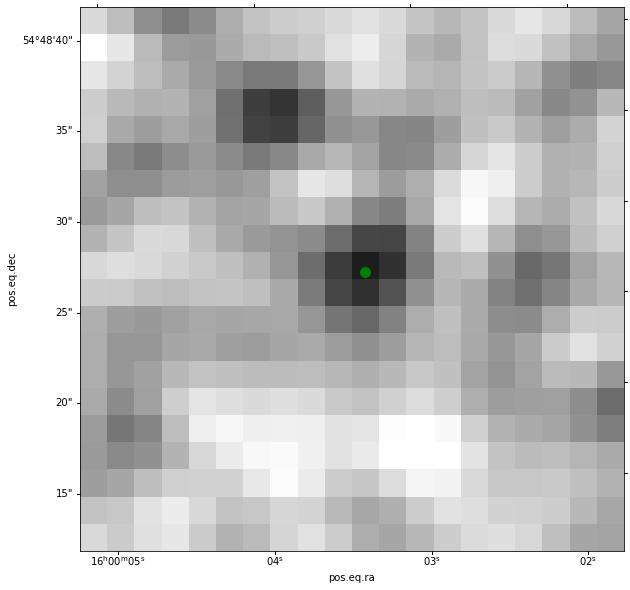

plotting 1 sources


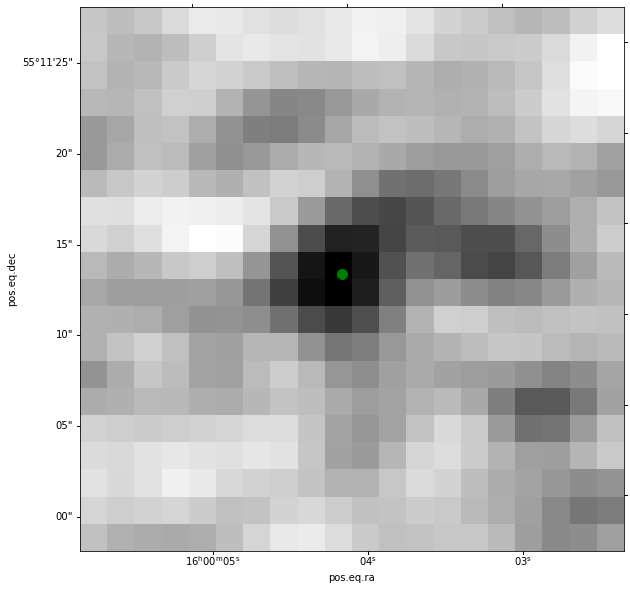

plotting 1 sources


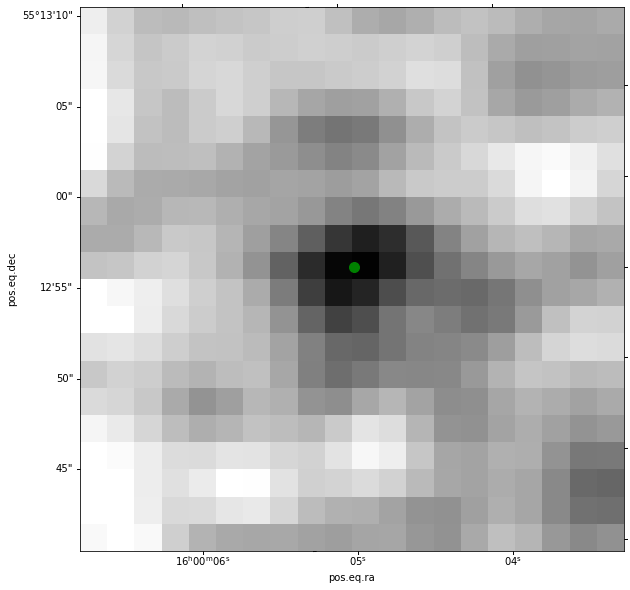

In [6]:
mask = lofar_orig['S_Code']=='S'


ra = lofar_orig[mask]['RA']
dec = lofar_orig[mask]['DEC']

print(len(ra))
for n in range(10):
    image_plotting.plot_figure(radim_data,[lofar_orig],radim_wcs,ra[n],dec[n],plot_params)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.01756717,  0.43143582,  0.8804388 ,  1.3294418 ,  1.7784448 ,
         2.2274477 ,  2.6764507 ,  3.1254537 ,  3.5744567 ,  4.0234594 ,
         4.4724627 ], dtype=float32),
 <a list of 14000 BarContainer objects>)

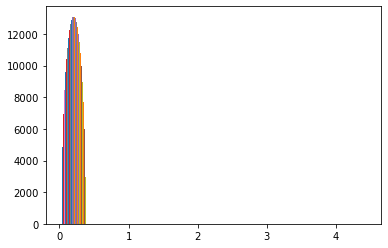

In [8]:
plt.hist(radim_data)

In [10]:
test = radim_data.flatten()

In [16]:
np.nanmax(np.log10(test))

0.6505467

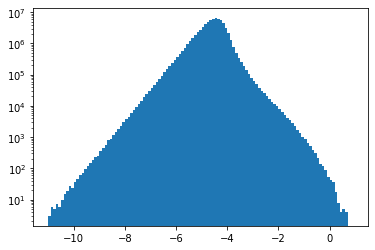

In [19]:
bins=np.arange(-11,1,0.1)
plt.hist(np.log10(test),bins=bins,log=True)
plt.show()

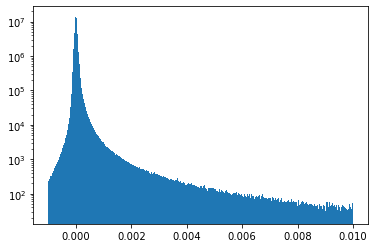

In [26]:
bins=np.arange(-0.001,0.01,0.00001)
plt.hist(test,bins=bins,log=True)
plt.show()

In [29]:
SNR = radim_data.flatten()/radim_err.flatten()

ValueError: operands could not be broadcast together with shapes (196000000,) (393824025,) 

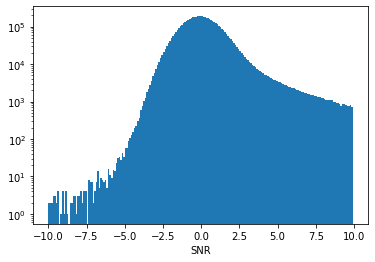

In [44]:
#fig = plt.figure(figsize=(10,10))

ra = 243
dec = 55
box_length=1

c = SkyCoord(ra*u.degree,dec*u.degree,unit='deg')
#length_x, length_y = get_pix_length(radim_data,radim_wcs,1,ra,dec)
pix_cent_x, pix_cent_y = radim_wcs.wcs_world2pix(ra,dec,0,ra_dec_order=True)
pixscale = np.array(radim_wcs.wcs_pix2world(0,0,0)) - np.array(radim_wcs.wcs_pix2world(1,1,0))
imgcut = Cutout2D(radim_data, c, size=[box_length*u.degree,box_length*u.degree], wcs=radim_wcs)
wcscut_map = imgcut.wcs
imgcut_map = imgcut.data

c = SkyCoord(ra*u.degree,dec*u.degree,unit='deg')
#length_x, length_y = get_pix_length(radim_data,radim_wcs,1,ra,dec)
pix_cent_x, pix_cent_y = radim_wcs_err.wcs_world2pix(ra,dec,0,ra_dec_order=True)
pixscale = np.array(radim_wcs_err.wcs_pix2world(0,0,0)) - np.array(radim_wcs_err.wcs_pix2world(1,1,0))
imgcut = Cutout2D(radim_err, c, size=[box_length*u.degree,box_length*u.degree], wcs=radim_wcs_err)
wcscut_err = imgcut.wcs
imgcut_err = imgcut.data

SNR = imgcut_map.flatten()/imgcut_err.flatten()
plt.hist(SNR,log=True,bins=np.arange(-10,10,0.1))
plt.xlabel('SNR')
plt.show()

In [2]:
imfolder='../../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE250_v1.0.fits'
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist['image'].header

im250=hdulist['image'].data*1.0E3 #convert to mJy
imerr250=hdulist['error'].data*1E3
w_250 = wcs.WCS(hdulist['image'].header)
hdulist.close()



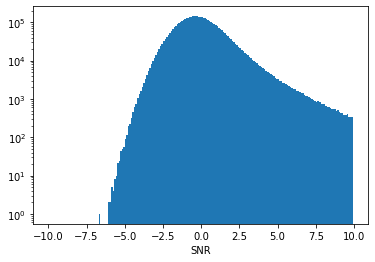

In [3]:
SNR = (im250/imerr250)
plt.hist(SNR.flatten(),log=True,bins=np.arange(-10,10,0.1))
plt.xlabel('SNR')
plt.show()

In [ ]:
SNR.shape